<a href="https://colab.research.google.com/github/itskrutz/nsps_proj/blob/main/nsps_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TR=pd.read_csv("UNSW_NB15_training-set.csv")

In [3]:
print(TR.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1     

In [4]:
print(TR.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

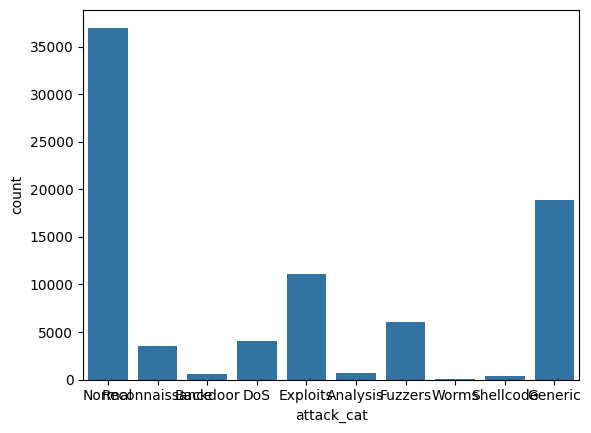

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [5]:

sns.countplot(x="attack_cat", data=TR)
plt.show()

# Frequency table
TR["service"].value_counts()



In [6]:
TR["attack_cat"].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
# Assuming your nominal feature is in a column named 'feature_name'
arr = ['proto','service','state']
for i in arr:
  le.fit(TR[i])
  TR[i] = le.transform(TR[i])

In [9]:
print(TR['proto'])

0        117
1        117
2        117
3        117
4        117
        ... 
82327    117
82328    111
82329      6
82330      6
82331    117
Name: proto, Length: 82332, dtype: int64


In [10]:
print(TR.head())

   id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011    117        0      4      2      0     496       0   
1   2  0.000008    117        0      4      2      0    1762       0   
2   3  0.000005    117        0      4      2      0    1068       0   
3   4  0.000006    117        0      4      2      0     900       0   
4   5  0.000010    117        0      4      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2         

In [11]:
TR['proto'].unique()

array([117,   6, 111,  41,  77,  95,  32,  30,  44,  49, 106,   4,  13,
        23,  25,  76,  85, 127,  72,  19,  33,  83, 114, 115, 128,  64,
        65,  57,  88,  74,  67,  66,   0,  37,  20,  38, 113,  51,  96,
        52,  55,  39,  68,  34,  90,  70,  73,  99, 112,  53,   3,  54,
        12,  91,  50,  61,  92,  16, 126,  86,  10, 108, 125, 122, 116,
       120,  75,  22,  24, 110, 103,  63,  71,   7,  47,   2,  69,  26,
        82,  31,  40,  81,  87,  94,  11,   8,  42,   9, 109, 121,  46,
        15,  60, 124,  98,  97, 129,  43,  89, 118,  28,  59,  27,  79,
         5,   1,  45, 102,  14,  56,  78, 123,  62, 130,  21,  35, 107,
       105, 119, 100, 101,  58,  84,  29,  17,  18,  93,  48,  80, 104,
        36])

In [12]:
TR['service'].unique()

array([ 0,  5,  3,  4,  9,  7,  2, 10, 12,  1,  6,  8, 11])

In [13]:
TR['state'].unique()

array([4, 3, 5, 0, 2, 6, 1])

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
df = pd.DataFrame(TR, columns=['spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','dwin','tcprtt','synack','ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports'])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)


[[9.39408173e-05 0.00000000e+00 3.28788116e-05 ... 0.00000000e+00
  1.63934426e-02 0.00000000e+00]
 [9.39408173e-05 0.00000000e+00 1.21066472e-04 ... 0.00000000e+00
  1.63934426e-02 0.00000000e+00]
 [9.39408173e-05 0.00000000e+00 7.27234732e-05 ... 0.00000000e+00
  3.27868852e-02 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.53248698e-06 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.53248698e-06 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [9.39408173e-05 0.00000000e+00 5.57267994e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [16]:
df = pd.DataFrame(df_scaled, columns=df.columns)  # Create a new DataFrame


In [17]:
print(df)

          spkts     dpkts    sbytes    dbytes      rate      sttl      dttl  \
0      0.000094  0.000000  0.000033  0.000000  0.090909  0.996078  0.000000   
1      0.000094  0.000000  0.000121  0.000000  0.125000  0.996078  0.000000   
2      0.000094  0.000000  0.000073  0.000000  0.200000  0.996078  0.000000   
3      0.000094  0.000000  0.000061  0.000000  0.166667  0.996078  0.000000   
4      0.000094  0.000000  0.000146  0.000000  0.100000  0.996078  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
82327  0.000094  0.000000  0.000006  0.000000  0.200000  0.996078  0.000000   
82328  0.001785  0.000726  0.001257  0.000024  0.000024  0.996078  0.996047   
82329  0.000000  0.000000  0.000002  0.000000  0.000000  0.000000  0.000000   
82330  0.000000  0.000000  0.000002  0.000000  0.000000  0.000000  0.000000   
82331  0.000094  0.000000  0.000006  0.000000  0.111111  0.996078  0.000000   

          sload     dload     sloss  ...  ct_dst_lt

In [18]:
df = df.assign(dur=TR['dur'], proto=TR['proto'],service=TR['service'], state=TR['state'],label=TR['label'], attack_cat=TR['attack_cat'])


In [19]:
df

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,dur,proto,service,state,label,attack_cat
0,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,0.000000,0.034238,0.000000,0.000000,...,0.0,0.000000,0.016393,0.0,0.000011,117,0,4,0,Normal
1,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,0.000000,0.167236,0.000000,0.000000,...,0.0,0.000000,0.016393,0.0,0.000008,117,0,4,0,Normal
2,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,0.000000,0.162187,0.000000,0.000000,...,0.0,0.000000,0.032787,0.0,0.000005,117,0,4,0,Normal
3,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,0.000000,0.113895,0.000000,0.000000,...,0.0,0.016949,0.032787,0.0,0.000006,117,0,4,0,Normal
4,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,0.000000,0.161427,0.000000,0.000000,...,0.0,0.016949,0.032787,0.0,0.000010,117,0,4,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,0.015793,0.000000,0.000000,...,0.0,0.016949,0.000000,0.0,0.000005,117,0,4,0,Normal
82328,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.996047,0.000024,0.000108,0.001316,...,0.0,0.033898,0.016393,0.0,1.106101,111,0,3,0,Normal
82329,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.0,0.000000,6,0,4,0,Normal
82330,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.0,0.000000,6,0,4,0,Normal


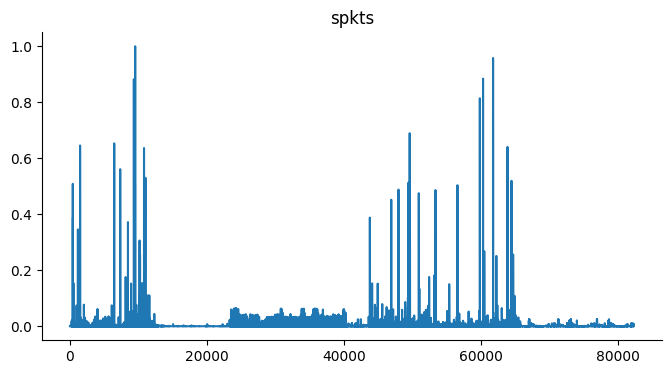

In [20]:
from matplotlib import pyplot as plt
df['spkts'].plot(kind='line', figsize=(8, 4), title='spkts')
plt.gca().spines[['top', 'right']].set_visible(False)

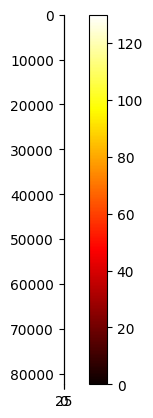

In [23]:

import numpy as np

plt.imshow(df, cmap="hot")  # Choose a colormap
plt.colorbar()
plt.show()
